### Data
We're going to use a mail response data set from a real direct marketing campaign located in `data/mailing.csv`. Each record represents an individual who was targeted with a direct marketing offer.  The offer was a solicitation to make a charitable donation. 

The columns (features) are:

```
Col.  Name      Descriptiona
----- --------- ----------------------------------------------------------------
1     income    household income
2     Firstdate data assoc. with the first gift by this individual
3     Lastdate  data associated with the most recent gift 
4     Amount    average amount by this individual over all periods (incl. zeros)
5     rfaf2     frequency code
6     rfaa2     donation amount code
7     pepstrfl  flag indicating a star donator
8     glast     amount of last gift
9     gavr      amount of average gift
10    class     one if they gave in this campaign and zero otherwise.
```

Our goal is to build a model to predict if people will give during the current campaign (this is the attribute called `"class"`).

# Part 1: ROC curve

### Tasks

```
1. Randomly assign 75% of your data into training and the remaining 25% into test (do not use cross-validation now) (2 points)
2. Train a logistic regression model and use the test data to get the data to create an ROC curve (2 points)
3. Train a decision tree model (criterion="entropy") and use the test data to get the data to create an ROC curve (2 points)
4. Plot both ROC curves on one plot with legends (2 points)
5. Discuss which model has better performance (2 points)
```

# Part 2: Cross Validation

These models are using their default complexity parameters and the decision tree can be very large, which means it may has overfitting problem. Let's use cross validation to to identify the overfitting problem and control the complexity of our decision tree.
### Tasks
```
1. Build decision trees on the same data set with maximum tree depths varing from 1 to 15 (2.5 points)
2. For each maximum depth, perform 5 folds cross-validation, and get the mean accuracy (2.5 points)
3. Plot the mean accuracies over maximum depth (2.5 points)
4. Find out what is the optimal maximum depth for the decision tree (2.5 points)
```

In [74]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [33]:
with open("data/mailing.csv") as datafile:
    data = pd.read_csv(datafile)
data[:10]

,Income,Firstdate,Lastdate,Amount,rfaf2,glast,gavr,class,rfaa2_G,rfaa2_E,rfaa2_F,pepstrfl_0
0,3,9409,9509,0.06,1,50,30.00,0,1,0,0,1
1,2,9201,9602,0.16,4,20,20.55,1,1,0,0,0
2,0,9510,9603,0.20,4,5,8.75,0,0,1,0,1
3,6,9409,9603,0.13,2,25,22.50,0,1,0,0,1
4,0,9310,9511,0.10,1,25,12.50,0,1,0,0,1
5,2,9601,9609,0.14,2,5,7.75,0,0,0,1,1
6,7,9510,9510,0.06,1,25,25.00,0,1,0,0,1
7,5,9209,9512,0.39,4,10,7.65,0,0,1,0,0
8,6,8702,9511,0.16,2,14,9.30,0,0,1,0,0
9,0,9103,9508,0.23,1,11,9.15,0,0,1,0,0


In [86]:
Y = data["class"]
X = data.drop(["class"],axis=1)
Y = np.ravel(Y)

# Part 1 Answers
Task 1

In [18]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [19]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(143834, 47945, 143834, 47945)

In [21]:
# Make a new log_model
log_model = LogisticRegression()

# Now fit the new model
log_model.fit(X_train, Y_train)

# Predict the classes of the testing data set
class_predict = log_model.predict(X_test)

# Compare the predicted classes to the actual test classes
print metrics.accuracy_score(Y_test,class_predict)

0.950067786005


Task 2

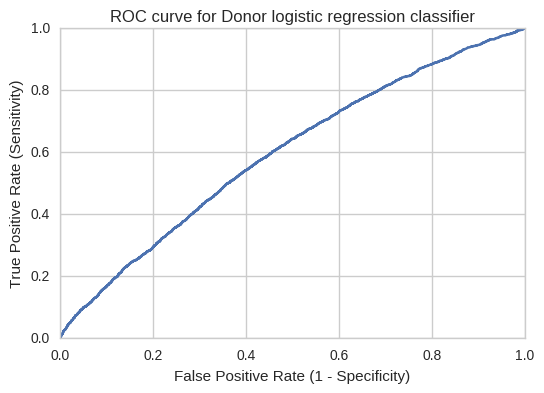

In [81]:
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Donor logistic regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Task 3

In [82]:
decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_train, Y_train)
print metrics.accuracy_score(decision_tree.predict(X_test), Y_test)

0.901053290228


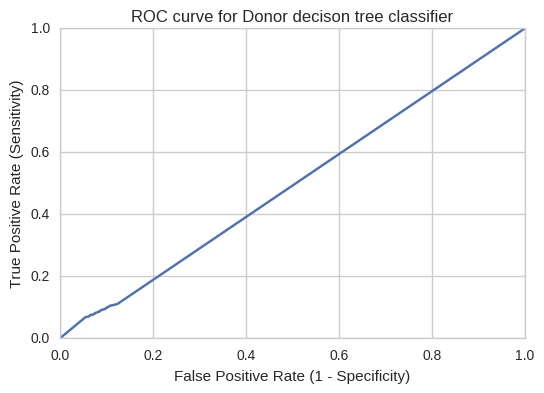

In [83]:
y_pred_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Donor decison tree classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Task 4

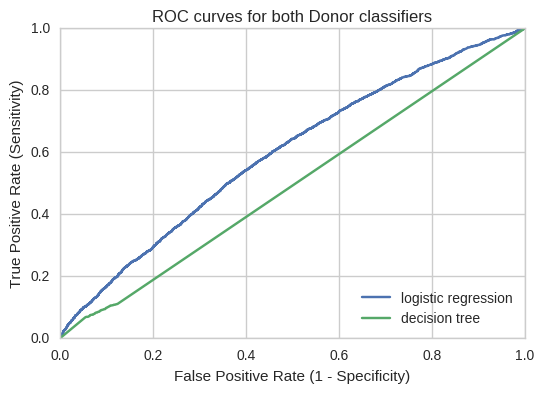

In [84]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, y_pred_prob)
fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_test, y_pred_prob_dt)
line1, = plt.plot(fpr1, tpr1, label="logistic regression")
line2, = plt.plot(fpr2, tpr2, label="decision tree")

plt.legend(handler_map={line1: HandlerLine2D()}, loc=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curves for both Donor classifiers')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

plt.show()

Task 5  
Based on comparison of the ROC curves, the logistic regression graph is above and closer to the top-left, thus it has better performance.

# Part 2 Answers
Task 1 and 2

In [76]:
k_range = list(range(1, 16))
k_scores = []

for k in k_range:
    dt = DecisionTreeClassifier(max_depth=k, criterion="entropy")
    scores = cross_val_score(dt, X, Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.94933751885027584, 0.94933751885027584, 0.94935316191040131, 0.94945223430737491, 0.94942616303895133, 0.9493531627260573, 0.94928537658530454, 0.94917066017654395, 0.94881608899552161, 0.94834679923065346, 0.94782015452405077, 0.94705364566507355, 0.9459586344463311, 0.94463419367293289, 0.9434453261326734]


Task 3

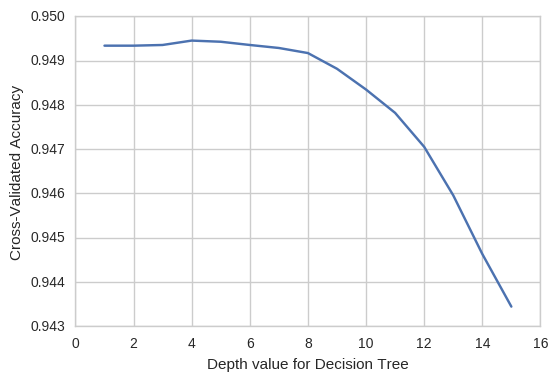

In [79]:
plt.plot(k_range, k_scores)
plt.xlabel('Depth value for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

Task 4  
Based on the graph, the optimal depth of the decision tree is 4.